In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import sqlite3
import json
from census import Census

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Necessary Imports
import pandas as pd

# Read in the excel file
sheets = ['Coal','Natural Gas','Petroleum','Nuclear','Total Renewable Energy']


energy_consumption= pd.read_excel('use_energy_source.xlsx',sheet_name=sheets,index_col=None,header=2)

In [119]:
energy_consumption['Coal'].head()


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,7189,11552,13559,11999,12029,9888,16431,18462,15998,...,15521,14819,18225,19511,16613,16376,17325,17620,18527,18694
1,AL,395400,382455,427177,442465,459000,533142,583457,580163,618335,...,547004,565051,575912,494311,410168,378890,377152,317180,256687,309791
2,AR,356,275,160,135,186,163,111,104,132,...,296732,327099,339214,226889,246437,267591,304145,239798,161980,216123
3,AZ,210,211,6291,8432,9103,7030,7373,7184,8137,...,420570,454865,447849,385822,323878,334512,331492,257727,156821,160299
4,CA,35903,59106,39681,46127,53723,63693,51515,53949,57011,...,43832,38151,39486,30967,32077,33663,33256,30886,28034,28244


In [4]:
# Review one of the dataframes in the variable
coal = energy_consumption['Coal']

coal_energy = coal[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]



In [112]:
coal_energy.head()


,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C)
State,,,,,,,,,,
AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527
AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687
AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980
AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821
CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034


In [111]:
coal_energy = coal_energy.rename(columns = {2011:'2011(C)',2012:'2012(C)',2013:'2013(C)',2014:'2014(C)',2015:'2015(C)',2016:'2016(C)',2017:'2017(C)',2018:'2018(C)',2019:'2019(C)',2020:'2020(C)'})
coal_energy.tail()


,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C)
State,,,,,,,,,,
WA,56951,42656,74955,76547,58273,53302,61732,61166,80837,59443
WI,447370,373281,454554,417096,408189,357335,388614,362077,280108,249316
WV,822645,756716,771188,816460,730949,751957,710445,661760,621722,539707
WY,467671,490128,520699,489300,487177,457315,458496,455748,410221,388253
US,19663856,17380923,18038771,17996577,15548985,14227138,13839632,13249958,11314925,9182696


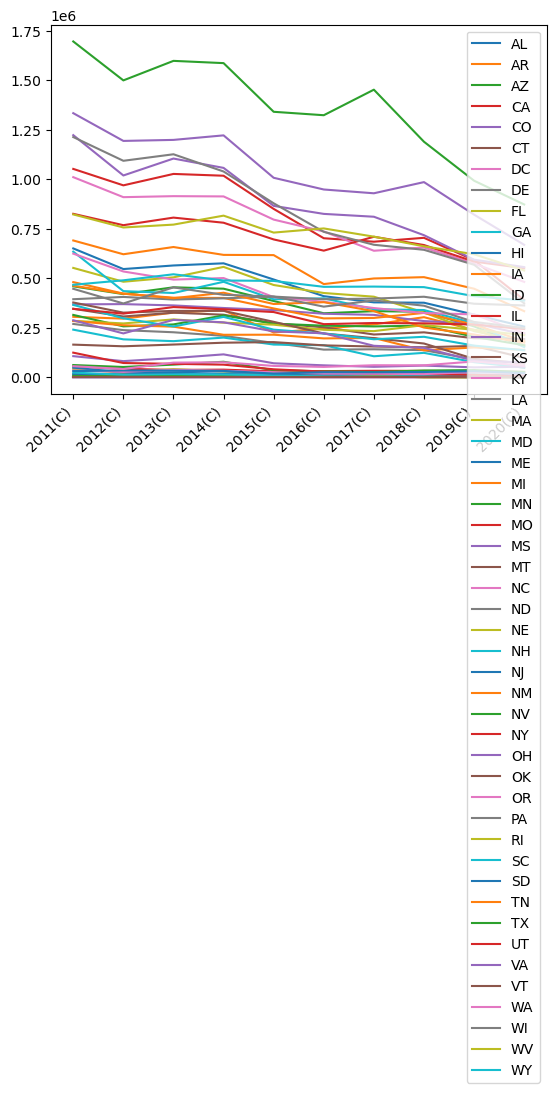

In [126]:
# Iterate over each row (excluding the first row) and plot each row individually
for index, row in coal_energy.iloc[1:-1].iterrows():
    row.plot(label=index)

# Add legend and display the plot
plt.xticks(range(len(coal_energy.columns)), coal_energy.columns, rotation=45, ha='right')
plt.legend()
plt.show()

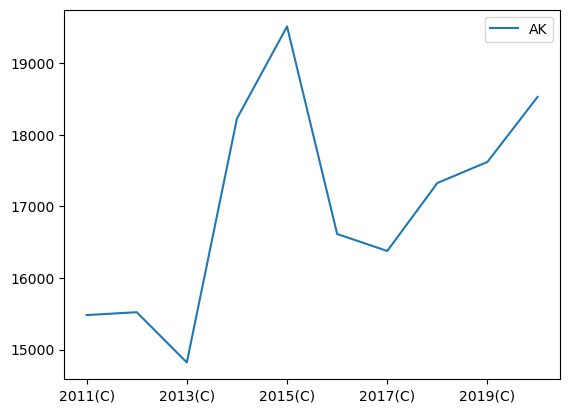

In [122]:
coal_energy.loc['AK', "2011(C)":].plot(label="AK")
plt.legend()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

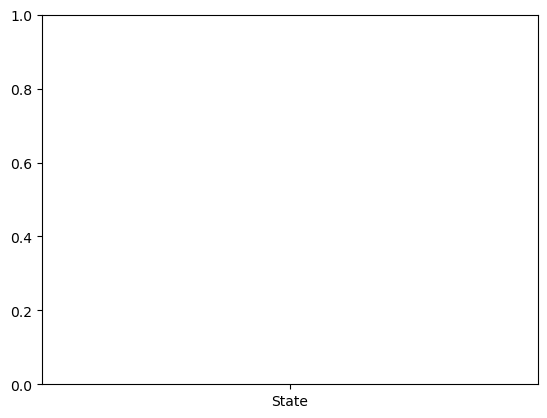

In [106]:
# Loop through all rows in the DataFrame
for index, row in coal_energy.iterrows():
#      plt.plot(coal_energy[column], label=column)
    # Access data in each row
#     print(f"Row index: {index}")
#     print("Row data:")
#     print(row)
        # Plot the row data
    plt.plot(row, label=f'Row {index}')

# Add labels and legend
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Plot of Each Row in DataFrame')
plt.legend()

# Show the plot
plt.show()

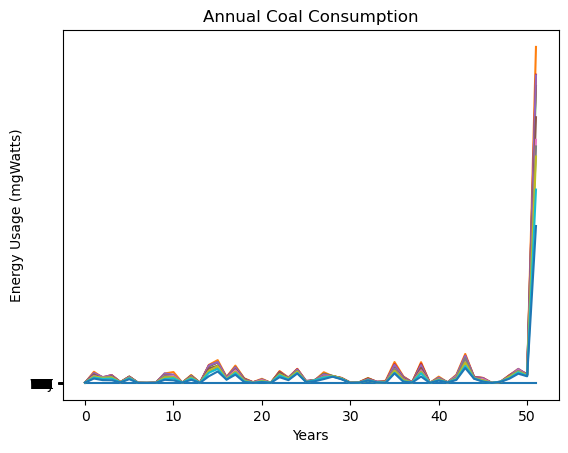

In [101]:
# Iterate over each column in the DataFrame
# for column in coal_energy.columns:
for column in coal_energy.iloc[:-1,:]:
    # Plot the values of the current column as a line
    plt.plot(coal_energy[column], label=column)
    
# Add labels and legend
plt.xlabel('Years')
plt.ylabel('Energy Usage (mgWatts)')
plt.title('Annual Coal Consumption')

# plt.legend()

# # Show the plot
plt.show()

In [7]:

gas = energy_consumption['Natural Gas']
gas_energy = gas[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
gas_energy.head()


,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,339819,347228,332631,329274,333936,330883,343899,346255,343384,373567
1,AL,609288,677380,625869,650570,701582,715033,681208,771194,748731,714871
2,AR,288906,300572,288045,273009,296826,315617,317530,366939,371388,335441
3,AZ,293134,339043,340375,315916,365313,373916,334629,400531,484249,513539
4,CA,2196252,2456371,2480792,2409574,2384061,2248939,2190994,2209801,2218732,2151068


In [8]:
gas_energy = gas_energy.rename(columns = {2011:'2011(G)',2012:'2012(G)',2013:'2013(G)',2014:'2014(G)',2015:'2015(G)',2016:'2016(G)',2017:'2017(G)',2018:'2018(G)',2019:'2019(G)',2020:'2020(G)'})
gas_energy.head()


,State,2011(G),2012(G),2013(G),2014(G),2015(G),2016(G),2017(G),2018(G),2019(G),2020(G)
0,AK,339819,347228,332631,329274,333936,330883,343899,346255,343384,373567
1,AL,609288,677380,625869,650570,701582,715033,681208,771194,748731,714871
2,AR,288906,300572,288045,273009,296826,315617,317530,366939,371388,335441
3,AZ,293134,339043,340375,315916,365313,373916,334629,400531,484249,513539
4,CA,2196252,2456371,2480792,2409574,2384061,2248939,2190994,2209801,2218732,2151068


In [9]:
petroleum = energy_consumption['Petroleum']
petroleum_energy = petroleum[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]


In [10]:
petroleum_energy = petroleum_energy.rename(columns = {2011:'2011(P)',2012:'2012(P)',2013:'2013(P)',2014:'2014(P)',2015:'2015(P)',2016:'2016(P)',2017:'2017(P)',2018:'2018(P)',2019:'2019(P)',2020:'2020(P)'})
petroleum_energy.head()


,State,2011(P),2012(P),2013(P),2014(P),2015(P),2016(P),2017(P),2018(P),2019(P),2020(P)
0,AK,268848,250063,230765,226102,235839,219837,216452,215613,220818,222323
1,AL,521337,513993,492294,490328,511742,538953,530370,518687,529319,525878
2,AR,337961,321213,321254,325319,314414,322808,321210,326432,330550,315440
3,AZ,552991,538460,543380,543552,557369,576213,583258,590247,607131,544270
4,CA,3174345,3079327,3096230,3083503,3201112,3315378,3392689,3409954,3395439,2688622


In [11]:
nuclear= energy_consumption['Nuclear']
nuclear_energy = nuclear[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]


In [12]:
total_renewable = energy_consumption['Total Renewable Energy']
total_renewable = total_renewable[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
total_renewable.head()


,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,16702,17831,18931,22760,23819,26254,24447,24996,23608,25527
1,AL,279972,265964,336863,293890,284365,259513,285081,301170,298545,308209
2,AR,135133,125377,132370,131625,129264,127831,121635,124834,132189,118123
3,AZ,129110,114315,119753,139836,149031,162028,172736,179533,174570,177618
4,CA,953565,818490,897358,903692,911138,1116287,1314777,1213958,1373488,1244897


In [13]:
total_renewable = total_renewable.rename(columns = {2011:'2011(TR)',2012:'2012(TR)',2013:'2013(TR)',2014:'2014(TR)',2015:'2015(TR)',2016:'2016(TR)',2017:'2017(TR)',2018:'2018(TR)',2019:'2019(TR)',2020:'2020(TR)'})
total_renewable.head()

,State,2011(TR),2012(TR),2013(TR),2014(TR),2015(TR),2016(TR),2017(TR),2018(TR),2019(TR),2020(TR)
0,AK,16702,17831,18931,22760,23819,26254,24447,24996,23608,25527
1,AL,279972,265964,336863,293890,284365,259513,285081,301170,298545,308209
2,AR,135133,125377,132370,131625,129264,127831,121635,124834,132189,118123
3,AZ,129110,114315,119753,139836,149031,162028,172736,179533,174570,177618
4,CA,953565,818490,897358,903692,911138,1116287,1314777,1213958,1373488,1244897


In [14]:
CG_merged_df = pd.merge(coal_energy,gas_energy)

CG_merged_df.head()

,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(G),2012(G),2013(G),2014(G),2015(G),2016(G),2017(G),2018(G),2019(G),2020(G)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,339819,347228,332631,329274,333936,330883,343899,346255,343384,373567
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,609288,677380,625869,650570,701582,715033,681208,771194,748731,714871
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,288906,300572,288045,273009,296826,315617,317530,366939,371388,335441
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,293134,339043,340375,315916,365313,373916,334629,400531,484249,513539
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,2196252,2456371,2480792,2409574,2384061,2248939,2190994,2209801,2218732,2151068


In [15]:
nuclear_energy = nuclear_energy.rename(columns = {2011:'2011(N)',2012:'2012(N)',2013:'2013(N)',2014:'2014(N)',2015:'2015(N)',2016:'2016(N)',2017:'2017(N)',2018:'2018(N)',2019:'2019(N)',2020:'2020(N)'})
nuclear_energy.head()

,State,2011(N),2012(N),2013(N),2014(N),2015(N),2016(N),2017(N),2018(N),2019(N),2020(N)
0,AK,0,0,0,0,0,0,0,0,0,0
1,AL,411822,427975,426488,431368,438728,417334,446097,412584,455865,454930
2,AR,148531,162353,124816,151428,144716,140370,132736,132996,141750,157349
3,AZ,327292,334636,328423,338044,340153,338636,338246,325122,333312,329597
4,CA,383644,193939,187162,177656,193529,197754,187227,190422,168799,169838


In [16]:
PCG_merged_df = pd.merge(CG_merged_df,petroleum_energy)
PCG_merged_df.head()


,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(P),2012(P),2013(P),2014(P),2015(P),2016(P),2017(P),2018(P),2019(P),2020(P)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,268848,250063,230765,226102,235839,219837,216452,215613,220818,222323
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,521337,513993,492294,490328,511742,538953,530370,518687,529319,525878
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,337961,321213,321254,325319,314414,322808,321210,326432,330550,315440
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,552991,538460,543380,543552,557369,576213,583258,590247,607131,544270
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,3174345,3079327,3096230,3083503,3201112,3315378,3392689,3409954,3395439,2688622


In [17]:
NPCG_energy_df = pd.merge(PCG_merged_df,nuclear_energy)
NPCG_energy_df.head()


,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(N),2012(N),2013(N),2014(N),2015(N),2016(N),2017(N),2018(N),2019(N),2020(N)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,0,0,0,0,0,0,0,0,0,0
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,411822,427975,426488,431368,438728,417334,446097,412584,455865,454930
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,148531,162353,124816,151428,144716,140370,132736,132996,141750,157349
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,327292,334636,328423,338044,340153,338636,338246,325122,333312,329597
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,383644,193939,187162,177656,193529,197754,187227,190422,168799,169838


In [18]:
merged_energy_df = pd.merge(NPCG_energy_df,total_renewable)
merged_energy_df.head()


,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(TR),2012(TR),2013(TR),2014(TR),2015(TR),2016(TR),2017(TR),2018(TR),2019(TR),2020(TR)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,16702,17831,18931,22760,23819,26254,24447,24996,23608,25527
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,279972,265964,336863,293890,284365,259513,285081,301170,298545,308209
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,135133,125377,132370,131625,129264,127831,121635,124834,132189,118123
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,129110,114315,119753,139836,149031,162028,172736,179533,174570,177618
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,953565,818490,897358,903692,911138,1116287,1314777,1213958,1373488,1244897


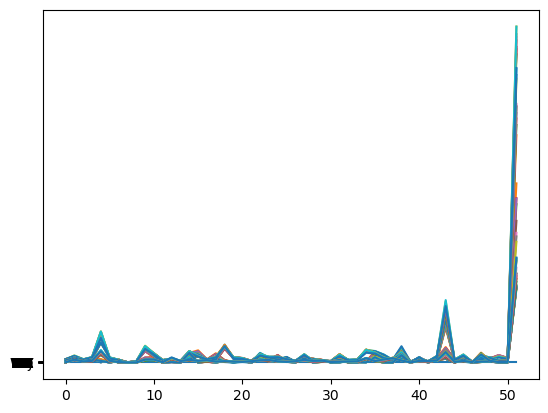

In [96]:
# Iterate over each column in the DataFrame
for column in merged_energy_df.columns:
    # Plot the values of the current column as a line
    plt.plot(merged_energy_df[column], label=column)

    


In [19]:
merged_energy_df.to_csv('Energy Consumption By Type 2011-2020.csv')


In [20]:
# Read the use_renew_sector.xlsx excel file 
sheets = ['Contents', 'Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy']

renewable_data = pd.read_excel('use_renew_sector.xlsx', sheet_name=sheets, index_col=None, header=2)

In [21]:
biomass = renewable_data['Biomass']
biomass_energy = biomass[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
biomass_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,8687
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,187599
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,74385
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,35235
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,400214


In [22]:
biomass_energy = biomass_energy.rename(columns={2011:'2011(BM)',
                                        2012:'2012(BM)',
                                        2013:'2013(BM)',
                                        2014:'2014(BM)',
                                        2015:'2015(BM)',
                                        2016:'2016(BM)',
                                        2017:'2017(BM)',
                                        2018:'2018(BM)',
                                        2019:'2019(BM)',
                                        2020:'2020(BM)'})
biomass_energy.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),2020(BM)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,8687
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,187599
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,74385
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,35235
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,400214


In [23]:
geothermal = renewable_data['Geothermal']
geothermal_energy = geothermal[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
geothermal_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,214,186,186,186,186,186,186,186,186,186
1,AL,135,141,141,141,141,141,141,141,141,141
2,AR,750,808,808,808,808,808,808,808,808,808
3,AZ,345,345,345,345,345,345,345,345,345,345
4,CA,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [24]:
geothermal_energy = geothermal_energy.rename(columns={2011:'2011(GT)',
                                        2012:'2012(GT)',
                                        2013:'2013(GT)',
                                        2014:'2014(GT)',
                                        2015:'2015(GT)',
                                        2016:'2016(GT)',
                                        2017:'2017(GT)',
                                        2018:'2018(GT)',
                                        2019:'2019(GT)',
                                        2020:'2020(GT)'})
geothermal_energy.head()

,State,2011(GT),2012(GT),2013(GT),2014(GT),2015(GT),2016(GT),2017(GT),2018(GT),2019(GT),2020(GT)
0,AK,214,186,186,186,186,186,186,186,186,186
1,AL,135,141,141,141,141,141,141,141,141,141
2,AR,750,808,808,808,808,808,808,808,808,808
3,AZ,345,345,345,345,345,345,345,345,345,345
4,CA,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [25]:
hydropower = renewable_data['Hydropower']
hydropower_energy = hydropower[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
hydropower_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [26]:
hydropower_energy = hydropower_energy.rename(columns={2011:'2011(HP)',
                                        2012:'2012(HP)',
                                        2013:'2013(HP)',
                                        2014:'2014(HP)',
                                        2015:'2015(HP)',
                                        2016:'2016(HP)',
                                        2017:'2017(HP)',
                                        2018:'2018(HP)',
                                        2019:'2019(HP)',
                                        2020:'2020(HP)'})
hydropower_energy.head()

,State,2011(HP),2012(HP),2013(HP),2014(HP),2015(HP),2016(HP),2017(HP),2018(HP),2019(HP),2020(HP)
0,AK,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [27]:
solar = renewable_data['Solar Energy']
solar_energy = solar[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
solar_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,3,3,3,3,3,14,20,28,40,62
1,AL,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [28]:
solar_energy = solar_energy.rename(columns={2011:'2011(S)',
                                        2012:'2012(S)',
                                        2013:'2013(S)',
                                        2014:'2014(S)',
                                        2015:'2015(S)',
                                        2016:'2016(S)',
                                        2017:'2017(S)',
                                        2018:'2018(S)',
                                        2019:'2019(S)',
                                        2020:'2020(S)'})
solar_energy.head()

,State,2011(S),2012(S),2013(S),2014(S),2015(S),2016(S),2017(S),2018(S),2019(S),2020(S)
0,AK,3,3,3,3,3,14,20,28,40,62
1,AL,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [29]:
wind = renewable_data['Wind Energy']
wind_energy = wind[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
wind_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,0,0,0,0,0,0,0,0,0,0
2,AR,0,0,0,0,0,0,0,0,0,0
3,AZ,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [30]:
wind_energy = wind_energy.rename(columns={2011:'2011(W)',
                                        2012:'2012(W)',
                                        2013:'2013(W)',
                                        2014:'2014(W)',
                                        2015:'2015(W)',
                                        2016:'2016(W)',
                                        2017:'2017(W)',
                                        2018:'2018(W)',
                                        2019:'2019(W)',
                                        2020:'2020(W)'})
wind_energy.head()

,State,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,0,0,0,0,0,0,0,0,0,0
2,AR,0,0,0,0,0,0,0,0,0,0
3,AZ,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [31]:
merge1 = pd.merge(biomass_energy, geothermal_energy)
merge1.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(GT),2012(GT),2013(GT),2014(GT),2015(GT),2016(GT),2017(GT),2018(GT),2019(GT),2020(GT)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,214,186,186,186,186,186,186,186,186,186
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,135,141,141,141,141,141,141,141,141,141
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,750,808,808,808,808,808,808,808,808,808
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,345,345,345,345,345,345,345,345,345,345
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [32]:
merge2 = pd.merge(merge1, hydropower_energy)
merge2.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(HP),2012(HP),2013(HP),2014(HP),2015(HP),2016(HP),2017(HP),2018(HP),2019(HP),2020(HP)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [33]:
merge3 = pd.merge(merge2, solar_energy)
merge3.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(S),2012(S),2013(S),2014(S),2015(S),2016(S),2017(S),2018(S),2019(S),2020(S)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,3,3,3,3,3,14,20,28,40,62
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [34]:
all_renewables = pd.merge(merge3, wind_energy)
all_renewables.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,0,0,0,0,0,0,0,0,0,0
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,0,0,0,0,0,0,0,0,0,0
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [35]:
# all_energy = pd.read_csv('Energy Consumption By Type 2011-2020.csv', index_col=None)
# all_energy = all_energy.drop(columns='Unnamed: 0')
# all_energy.head()

In [36]:
all_energy_plus_all_renewables = pd.merge(merged_energy_df, all_renewables)
all_energy_plus_all_renewables.head(3)


,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,0,0,0,0,0,0,0,0,0,0
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,0,0,0,0,0,0,0,0,0,0


In [37]:
all_energy_plus_all_renewables.tail(3)

,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
49,WV,822645,756716,771188,816460,730949,751957,710445,661760,621722,...,10712,12238,13229,13801,12818,13216,15491,16103,14515,16638
50,WY,467671,490128,520699,489300,487177,457315,458496,455748,410221,...,44809,41576,42298,41894,34990,40505,39785,36912,37045,48329
51,US,19663856,17380923,18038771,17996577,15548985,14227138,13839632,13249958,11314925,...,1167636,1340059,1601359,1727360,1776353,2094687,2341619,2480728,2633058,2962703


In [85]:
all_energy_plus_all_renewables = all_energy_plus_all_renewables.rename_axis('State')
all_energy_plus_all_renewables.head(2)

,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
State,,,,,,,,,,,,,,,,,,,,,
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Iterate over each column in the DataFrame
for column in state_data_plot_points.columns:
    # Plot the values of the current column as a line
    plt.plot(state_data_plot_points[column], label=column)
    
print(state_data_plot_points[column])


# Add labels and legend
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Line Plot of DataFrame Columns')
# plt.legend()

# # Show the plot
# plt.show()

State         AK
2011(C)    15481
2012(C)    15521
2013(C)    14819
2014(C)    18225
           ...  
2016(W)     1562
2017(W)     1305
2018(W)     1410
2019(W)     1269
2020(W)     1127
Name: AK, Length: 101, dtype: object
State          AL
2011(C)    651032
2012(C)    547004
2013(C)    565051
2014(C)    575912
            ...  
2016(W)         0
2017(W)         0
2018(W)         0
2019(W)         0
2020(W)         0
Name: AL, Length: 101, dtype: object
State          AR
2011(C)    306119
2012(C)    296732
2013(C)    327099
2014(C)    339214
            ...  
2016(W)         0
2017(W)         0
2018(W)         0
2019(W)         0
2020(W)         0
Name: AR, Length: 101, dtype: object
State          AZ
2011(C)    459909
2012(C)    420570
2013(C)    454865
2014(C)    447849
            ...  
2016(W)      4998
2017(W)      5248
2018(W)      4824
2019(W)      4933
2020(W)      5647
Name: AZ, Length: 101, dtype: object
State          CA
2011(C)     55264
2012(C)     43832
2013(C)     38151

In [39]:
# Get unique state values from the 'State' column and convert them to a list
state_list = all_energy_plus_all_renewables['State'].unique().tolist()


In [49]:
# Initialize an empty dictionary to hold data for each state
state_data_dict = {}

# Iterate over each state in state_list
for state in state_list:
    # Select data for the current state
    state_data = all_energy_plus_all_renewables[all_energy_plus_all_renewables['State'] == state]
    
    # Convert the selected data to a dictionary where keys are row indices and values are row data as lists
    state_data_dict[state] = {idx: row_data.tolist() for idx, row_data in state_data.iterrows()}

# Loop through each state in the dictionary
for state, state_data in state_data_dict.items():
    # Access data for the first index (row) of the current state
    first_row_data = state_data.get(0)
    
    # Display state name and data for the first index
#     print(f"State: {state}")
#     print("Data for first index:", first_row_data)
    
    # Extract indices and corresponding data from the state_data dictionary
    states = list(state_data.keys())
    states_info = [row_data for row_data in state_data.values()]

    # Plot the data for the current state
#     plt.plot(states, states_info, label=state)
    print(states_info[0][0])
    print(states_info[0][1])
# Add labels and legend
# plt.xlabel('Index')
# plt.ylabel('Data')
# plt.title('Data for Each State')
# plt.legend(title='State')

# Show the plot
# plt.show()

AK
15481
AL
651032
AR
306119
AZ
459909
CA
55264
CO
368871
CT
6081
DC
48
DE
17881
FL
552730
GA
634756
HI
16080
IA
463138
ID
7846
IL
1052224
IN
1333442
KS
346521
KY
1010623
LA
269993
MA
42963
MD
241190
ME
1542
MI
691150
MN
315604
MO
825650
MS
107546
MT
165687
NC
624783
ND
394771
NE
285384
NH
24489
NJ
49592
NM
284737
NV
62701
NY
125181
OH
1222606
OK
378320
OR
35135
PA
1212984
RI
0
SC
366160
SD
32112
TN
481127
TX
1695239
UT
346181
VA
288348
VT
0
WA
56951
WI
447370
WV
822645
WY
467671
US
19663856


In [ ]:

# Initialize an empty dictionary to hold data for each state
state_data_dict = {}

# Iterate over each state in state_list
for state in state_list:
    # Select data for the current state
    state_data = all_energy_plus_all_renewables[all_energy_plus_all_renewables['State'] == state]
    
    # Convert the selected data to a list and store it in the dictionary
    state_data_dict[state] = state_data.values.tolist()
    
# # Loop through each state in the dictionary
# item for item for state, data in state_data_dict.items():
#     # Display the state name
#     print(f"State: {state}")
    

# Display the dictionary
# state_data_dict

# Select data for Alaska ('AK')
ak_data = state_data_dict.get('AK')

ak_data[0]

In [ ]:
# Create a graph based upon the list and array we have created
# plt.figure(figsize=(10, 6))
for state in state_list:
    state_data = all_energy_plus_all_renewables[all_energy_plus_all_renewables['State'] == state]
    
    # While we are still shopping...
#     while state_data == "y":
    
state_data

In [ ]:
# Retrieve all energy type 
coal_energy_columns = [col for col in all_energy_plus_all_renewables.columns if '(C)' in col]

In [ ]:


state_coal_energy_usage = all_energy_plus_all_renewables[['State'] + coal_energy_columns]
state_coal_energy_usage.head()

# for state in state_list:
#     # Create a Series for each state that looks for the chosen energy type from 2011 to 2020
#     coal_energy_consumption = all_energy_plus_all_renewables.loc[state,
#                                                 [f"2011{coal}",
#                                                  f"2012{coal}", 
#                                                  f"2013{coal}"]]


In [ ]:
# Select all States' info
states = all_energy_plus_all_renewables['State'].unique()


    
    # Collecting data...
    while shopping == "y":
    plt.plot(state_data['State'], state_data[['2011(C)', '2012(C)']], label=state)
    
# Set labels and legend
plt.xlabel('State')
plt.ylabel('Data')
plt.title('Data by State')
plt.legend(title='State')

# Set x-axis labels to state names
plt.xticks(states)

# Show the graph that we have created
plt.show()

In [ ]:
# Select all States' info
states = all_energy_plus_all_renewables['State'].unique()

# Create a graph based upon the list and array we have created
coal_stats = ['2011(C)', '2012(C)','2013(C)','2014(C)','2015(C)','2016(C)','2017(C)','2018(C)','2019(C)', '2020(C)']
plt.plot('State', coal_stats)
# Show the graph that we have created
plt.show()

In [ ]:
# Export the 'energy_data_totals_df' and the 'grouped_renewables_df' as CSV files
all_renewables.to_csv('renewable_energy_2011_2020.csv', sep=',', index=True, encoding='utf-8')
all_energy_plus_all_renewables.to_csv('all_energy_plus_all_renewables.csv', sep=',', index=True, encoding='utf-8')